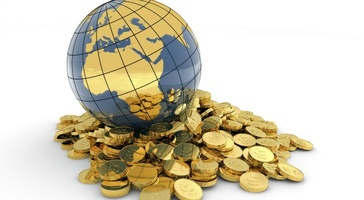

# Africa Economic, Banking and Systemic Crisis Data 
# Regression Project


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

## 1. EDA
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

In [ ]:
df = pd.read_csv('/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv', index_col='cc3')
df.head(3)

In [ ]:
df["banking_crisis_new"]=df.banking_crisis.replace({'crisis':1,'no_crisis':0})
df=df.drop(columns='banking_crisis',axis=0)
df.head(1)

In [ ]:
print("Checking the columns in the dataset.")
df.columns

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

The Dataset has no null value.

In [ ]:
df.describe()

In [ ]:
# Dataset is non-uniform and recently formed countries have least data
plt.figure(figsize=(8,8))
counts= df['country'].value_counts()
country=counts.index
explode = (0.2, 0.1, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0)
plt.pie(counts, explode=explode,labels=country,autopct='%1.1f%%')
plt.show()

# 2. Which factors are most associated with exchange usd in Africa (Egypt) ?

In [ ]:
EGY=df.loc['EGY',['country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis_new']] #Belirtilen indeksin sadece A ve B sütunlarının görüntülenmesi
EGY.head(1)

In [ ]:
add = pd.read_csv('/kaggle/input/egypt-gdp/yeni.csv',index_col=0)
add.head(5)

In [ ]:
add = add.drop(columns='year',axis=0)
add = add.rename(columns={" Growth": "growth", " Per Capita": "per_capita", "GDP":"gdp"})

In [ ]:
EGY=EGY.loc [ EGY ['year'] >=1965]
EGY=EGY.reset_index()
EGY.head(2)

In [ ]:
egy_new = pd.concat([EGY,add], axis=1)
egy_new.head(2)

In [ ]:
egy_new.info()

In [ ]:
egy_new.describe()

In [ ]:
egy_new=egy_new.drop(columns=['independence','domestic_debt_in_default', 'gdp_weighted_default', 'sovereign_external_debt_default'],axis=0)

In [ ]:
egy_new.corr().exch_usd.abs().sort_values()

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(egy_new.corr(), cmap='magma', annot=True)
plt.ylim(0,10)

In [ ]:
#Model 1
Y = egy_new['exch_usd']


X = egy_new[[ 'year', 'systemic_crisis','inflation_annual_cpi', 'currency_crises', 'inflation_crises',
       'banking_crisis_new', 'gdp', 'per_capita', 'growth']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

In [ ]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Exch_Usd (Model 1): Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#Model 2
egy_new['inflation']=egy_new['inflation_annual_cpi']*egy_new['inflation_crises']

In [ ]:
Y = egy_new['exch_usd']

X = egy_new[[ 'year', 'systemic_crisis','inflation_annual_cpi', 'currency_crises', 
       'banking_crisis_new', 'gdp', 'per_capita','inflation']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

In [ ]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Exch_Usd (Model 2): Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#Model 3
egy_new['crises'] = egy_new.banking_crisis_new*egy_new.systemic_crisis

In [ ]:
Y = egy_new['exch_usd']

X = egy_new[[ 'year', 'systemic_crisis','inflation_annual_cpi', 
       'banking_crisis_new', 'gdp', 'per_capita','crises']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

In [ ]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Exch_Usd (Model 3): Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#Model 4
Y = egy_new['exch_usd']

X = egy_new[[ 'year', 'inflation_annual_cpi', 'banking_crisis_new', 'gdp', 'per_capita']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

In [ ]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Exch_Usd (Model 4): Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#Model 5
Y = egy_new['exch_usd']

X = egy_new[[ 'year', 'inflation_annual_cpi', 'gdp', 'per_capita']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

In [ ]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Exch_Usd (Model 5): Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

# Conclusion:

When we look at the MAE, MSE, RMSE, R Squared values and the prediction graph of the 5th model among the 5 models we created, more meaningful results are obtained. The variables '' year ',' inflation_annual_cpi ',' gdp ',' per_capita '' are effective on the dollar rate of Egypt.